In [47]:
import sqlite3
import pandas

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT teamID, yearID, sum(salary)/1000 as total_payroll_by_thousand FROM Salaries GROUP BY teamID, yearID"

team_salaries = pandas.read_sql(salary_query, conn)

team_query = "SELECT (W*100.0/G) as winning_percentage, * FROM Teams GROUP BY teamID, yearID"

team_table = pandas.read_sql(team_query, conn)
#team_salaries
result = pandas.merge(team_salaries, team_table, how='outer', on=['teamID','yearID'])
#team_table
result

,teamID,yearID,total_payroll_by_thousand,winning_percentage,lgID,franchID,divID,Rank,G,Ghome,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,ATL,1985,14807.000,40.740741,NL,ATL,W,5.0,162.0,81.0,...,197.0,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105.0,106.0,ATL,ATL,ATL
1,BAL,1985,11560.712,51.552795,AL,BAL,E,4.0,161.0,81.0,...,168.0,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97.0,97.0,BAL,BAL,BAL
2,BOS,1985,10897.560,49.693252,AL,BOS,E,5.0,163.0,81.0,...,161.0,0.97,Boston Red Sox,Fenway Park II,1786633.0,104.0,104.0,BOS,BOS,BOS
3,CAL,1985,14427.894,55.555556,AL,ANA,W,2.0,162.0,79.0,...,202.0,0.98,California Angels,Anaheim Stadium,2567427.0,100.0,100.0,CAL,CAL,CAL
4,CHA,1985,9846.178,52.147239,AL,CHW,W,3.0,163.0,81.0,...,152.0,0.98,Chicago White Sox,Comiskey Park,1669888.0,104.0,104.0,CHW,CHA,CHA
5,CHN,1985,12702.917,47.530864,NL,CHC,E,4.0,162.0,81.0,...,150.0,0.97,Chicago Cubs,Wrigley Field,2161534.0,110.0,110.0,CHC,CHN,CHN
6,CIN,1985,8359.917,54.938272,NL,CIN,W,2.0,162.0,81.0,...,142.0,0.98,Cincinnati Reds,Riverfront Stadium,1834619.0,104.0,105.0,CIN,CIN,CIN
7,CLE,1985,6551.666,37.037037,AL,CLE,E,7.0,162.0,81.0,...,161.0,0.97,Cleveland Indians,Cleveland Stadium,655181.0,99.0,100.0,CLE,CLE,CLE
8,DET,1985,10348.143,52.173913,AL,DET,E,3.0,161.0,81.0,...,152.0,0.97,Detroit Tigers,Tiger Stadium,2286609.0,100.0,98.0,DET,DET,DET
9,HOU,1985,9993.051,51.234568,NL,HOU,W,3.0,162.0,81.0,...,159.0,0.97,Houston Astros,Astrodome,1184314.0,97.0,96.0,HOU,HOU,HOU


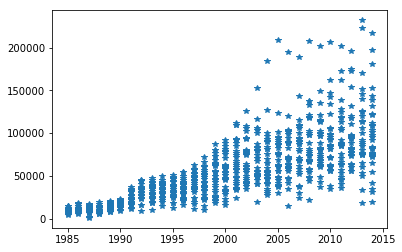

In [48]:
import matplotlib.pyplot as plt 
%matplotlib inline

result.sort_values("yearID", ascending=True)
plt.plot(result['yearID'], result['total_payroll_by_thousand'], '*')